# Simple Image Classification using VGG19

This code template is for image classification using VGG19 model.

## Required Packages

In [1]:
from tensorflow.keras.applications.imagenet_utils import preprocess_input, decode_predictions
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg19 import VGG19
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

## Downloading VGG19 weights

**VGG19** is a variant of VGG model which in short consists of 19 layers (16 convolution layers, 3 Fully connected layer, 5 MaxPool layers and 1 SoftMax layer). There are other variants of VGG like VGG11, VGG16 and others. VGG19 has 19.6 billion FLOPs.

**parameters :**
>**include_top:** whether to include the 3 fully-connected layers at the top of the network.

>**weights:** one of None (random initialization), 'imagenet' (pre-training on ImageNet), or the path to the weights file to be loaded.

>**input_tensor:** optional Keras tensor (i.e. output of layers.Input()) to use as image input for the model.

>**input_shape:** optional shape tuple, only to be specified if include_top is False (otherwise the input shape has to be (224, 224, 3) (with channels_last data format) or (3, 224, 224) (with channels_first data format). It should have exactly 3 inputs channels, and width and height should be no smaller than 32. E.g. (200, 200, 3) would be one valid value.

>**classes:** optional number of classes to classify images into, only to be specified if include_top is True, and if no weights argument is specified.

>**classifier_activation:** A str or callable. The activation function to use on the "top" layer. Ignored unless include_top=True. Set classifier_activation=None to return the logits of the "top" layer. When loading pretrained weights, classifier_activation can only be None or "softmax".

In [2]:
model = VGG19(weights='imagenet')

574726144/574710816 [==============================] - 206s 0us/step


## Model Summary

In [3]:
model.summary()

Model: "vgg19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

## Save VGG19 model

In [4]:
model.save('Image_classification.h5')

## Load VGG19 model

In [6]:
vgg19 = load_model("Image_classification.h5")

## Testing our model

In [9]:
def predictions(img_path):
    img =image.load_img(img_path , target_size=(224,224))

    x = image.img_to_array(img)
    x = np.expand_dims(x , axis=0)

    x = preprocess_input(x)

    preds = vgg19.predict(x)

    preds = decode_predictions(preds , top=1)
    result = str(preds[0][0][1])
    
    return (result,img)

## Show the result

(-0.5, 223.5, 223.5, -0.5)

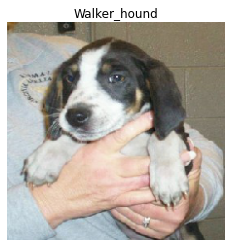

In [11]:
img_path = ''

result,img = predictions(img_path)

plt.title(result)
plt.imshow(img)
plt.axis("off")

## Creator: Abhishek Garg, Github: [Profile](https://github.com/abhishek-252)